# Case Bikestore

## Imports modul and read in data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("bike_sales.csv")
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


## Analysera

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

## convert date -> datetime

In [4]:
df["Date"] = pd.to_datetime(df["Date"])

In [5]:
df.dtypes

Date                datetime64[ns]
Day                          int64
Month                       object
Year                         int64
Customer_Age                 int64
Age_Group                   object
Customer_Gender             object
Country                     object
State                       object
Product_Category            object
Sub_Category                object
Product                     object
Order_Quantity               int64
Unit_Cost                    int64
Unit_Price                   int64
Profit                       int64
Cost                         int64
Revenue                      int64
dtype: object

## Create years and months columns

In [6]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["MonthName"] = df["Date"].dt.month_name()

display(df[["Date", "Year", "Month", "MonthName"]].head())


,Date,Year,Month,MonthName
0,2013-11-26,2013,11,November
1,2015-11-26,2015,11,November
2,2014-03-23,2014,3,March
3,2016-03-23,2016,3,March
4,2014-05-15,2014,5,May


## Total per year

In [7]:
yearly_revenue = df.groupby("Year")["Revenue"].sum().reset_index().sort_values("Year")

yearly_revenue

,Year,Revenue
0,2011,8964888
1,2012,9175983
2,2013,15240037
3,2014,14152724
4,2015,20023991
5,2016,17713385


## Total per month(all years)

In [8]:
monthly_revenue = df.groupby("MonthName")["Revenue"].sum().reset_index()
display(df[["Date", "Year", "Month", "MonthName"]].head())

,Date,Year,Month,MonthName
0,2013-11-26,2013,11,November
1,2015-11-26,2015,11,November
2,2014-03-23,2014,3,March
3,2016-03-23,2016,3,March
4,2014-05-15,2014,5,May


In [9]:
month_order = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

monthly_revenue["MonthName"] = pd.Categorical(
    monthly_revenue["MonthName"], categories=month_order, ordered=True
)

monthly_revenue = monthly_revenue.sort_values("MonthName")
monthly_revenue


,MonthName,Revenue
4,January,7005895
3,February,6834583
7,March,7347164
0,April,7602750
8,May,8836763
6,June,9043008
5,July,5721459
1,August,5711193
11,September,5841885
10,October,5995079


## Total per year + month

In [10]:
df["YearMonth"] = df["Date"].dt.to_period("M")

year_month_revenue = df.groupby("YearMonth")["Revenue"].sum().reset_index()

year_month_revenue


,YearMonth,Revenue
0,2011-01,675193
1,2011-02,637598
2,2011-03,708517
3,2011-04,698782
4,2011-05,734537
...,...,...
57,2016-03,2608663
58,2016-04,2756864
59,2016-05,3264343
60,2016-06,3586300


## Visualize - Annual sales

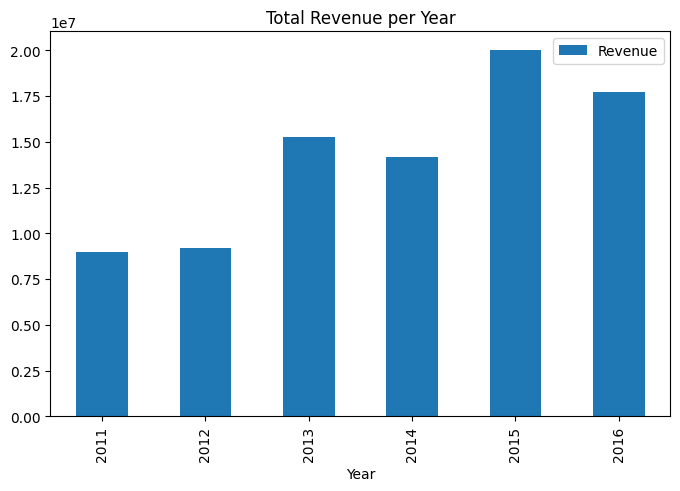

In [11]:
yearly_revenue.plot(
    x="Year",
    y="Revenue",
    kind="bar",
    title="Total Revenue per Year",
    figsize=(8, 5),
)
plt.show()


## Visualization - Monthly sales

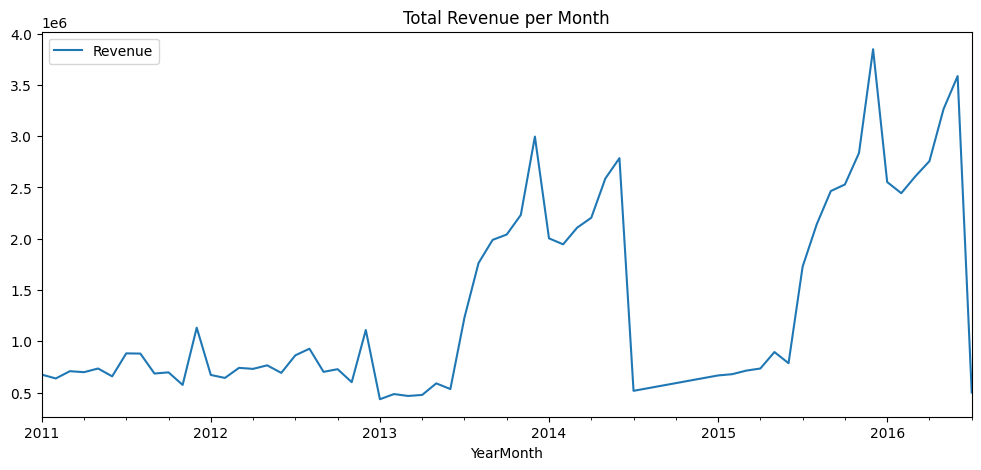

In [12]:
year_month_revenue.plot(
    x="YearMonth",
    y="Revenue",
    kind="line",
    title="Total Revenue per Month",
    figsize=(12, 5),
)
plt.show()